In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
songs = pd.read_csv('data/df_audio_features.csv')

In [134]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         10 non-null     object 
 1   artist            10 non-null     object 
 2   danceability      10 non-null     float64
 3   energy            10 non-null     float64
 4   key               10 non-null     int64  
 5   loudness          10 non-null     float64
 6   mode              10 non-null     int64  
 7   speechiness       10 non-null     float64
 8   acousticness      10 non-null     float64
 9   instrumentalness  10 non-null     float64
 10  liveness          10 non-null     float64
 11  valence           10 non-null     float64
 12  tempo             10 non-null     float64
 13  duration_ms       10 non-null     int64  
 14  time_signature    10 non-null     int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 1.3+ KB


In [136]:
def range_scaling(col,min,max):
    norm_val = []
    for val in col:
        norm_val.append((val - min) / (max - min))
    return norm_val

In [137]:
def return_combination(songs,math_function,scale):
    plot_plot(calculate_distances(scale_df(songs,scale),math_function),math_function,scale)

In [138]:
def scale_df(songs_scaled,scale):
    if (scale == 'scale_range'):
        songs_scaled.loudness = range_scaling(songs_scaled.loudness,-60,0)
        songs_scaled.key = range_scaling(songs_scaled.key,-1,12)
        songs_scaled.tempo = range_scaling(songs_scaled.tempo,songs_scaled.tempo.min(),songs_scaled.tempo.max())
        songs_scaled.duration_ms = range_scaling(songs_scaled.duration_ms,songs_scaled.duration_ms.min(),songs_scaled.duration_ms.max())
        songs_scaled.drop('time_signature',axis=1,inplace=True)
        songs_scaled.drop('duration_ms',axis=1,inplace=True)
    elif (scale == 'scale_min-max') :
        songs_scaled.loudness = range_scaling(songs_scaled.loudness,songs_scaled.loudness.min(),songs_scaled.loudness.max())
        songs_scaled.key = range_scaling(songs_scaled.key,songs_scaled.key.min(),songs_scaled.key.max())
        songs_scaled.tempo = range_scaling(songs_scaled.tempo,songs_scaled.tempo.min(),songs_scaled.tempo.max())
        songs_scaled.duration_ms = range_scaling(songs_scaled.duration_ms,songs_scaled.duration_ms.min(),songs_scaled.duration_ms.max())
        songs_scaled.drop('time_signature',axis=1,inplace=True)
        songs_scaled.drop('duration_ms',axis=1,inplace=True)
    else :
        songs_scaled = songs_scaled
    return songs_scaled

In [139]:
def calculate_distances(songs_scaled,math_function):
    all_distances = []
    for index, song in songs_scaled.iterrows():
        distances = []
        for i, song_compare in songs_scaled.iterrows():
            if(math_function == 'euclidean'):
                total = sum(((song.iloc[pos]- song_compare.iloc[pos])**2) for pos in range(2,songs_scaled.shape[1]))**(1/2)
            else:
                total = sum(abs(song.iloc[pos]- song_compare.iloc[pos]) for pos in range(2,songs_scaled.shape[1]))
            distances.append(total)
        all_distances.append(distances)
    man_euc_distance = pd.DataFrame(all_distances)
    man_euc_distance.columns = songs['song_name']
    man_euc_distance.index = songs['song_name']
    return man_euc_distance

In [140]:
def plot_plot(song_scaled,math_function,scale):
    plt.subplots(figsize=(12,8))
    sns.heatmap(song_scaled)
    plt.title(f"Heatmap for {math_function} and {scale} scaling")

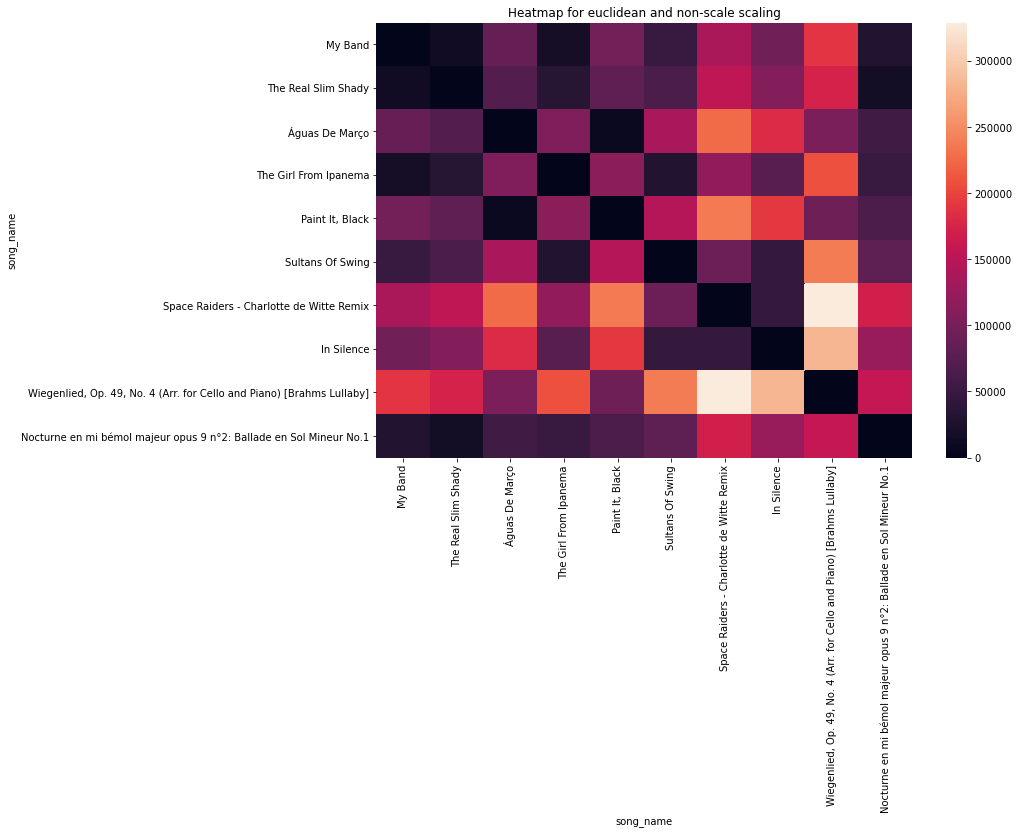

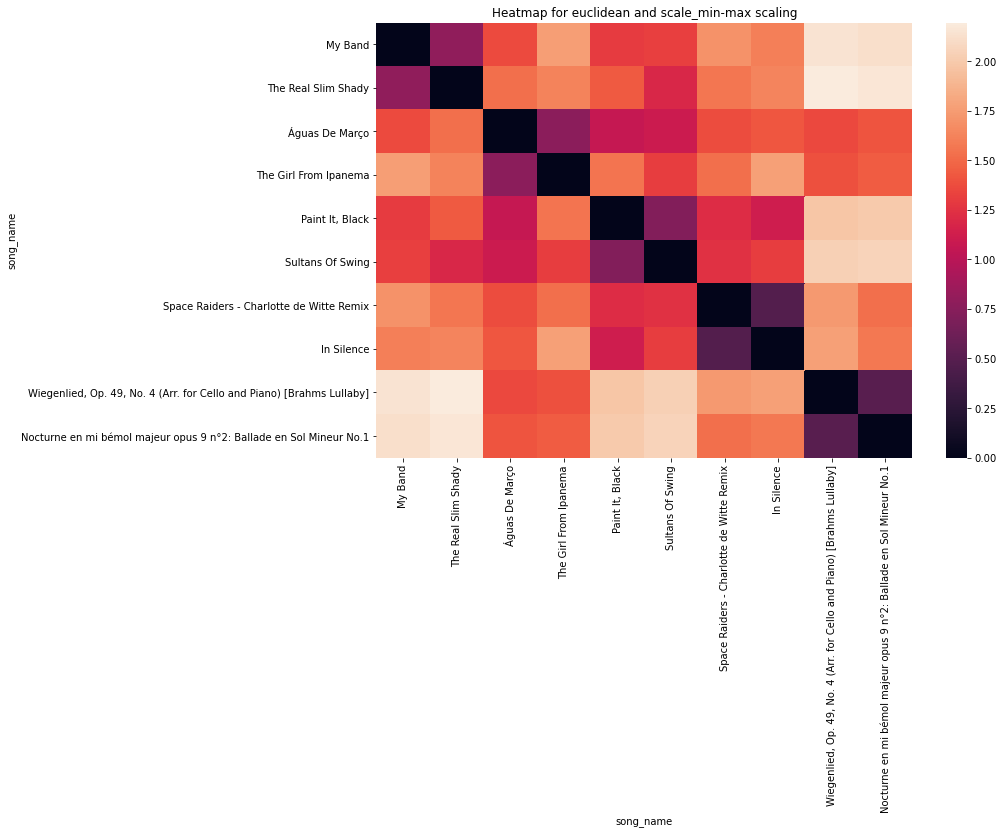

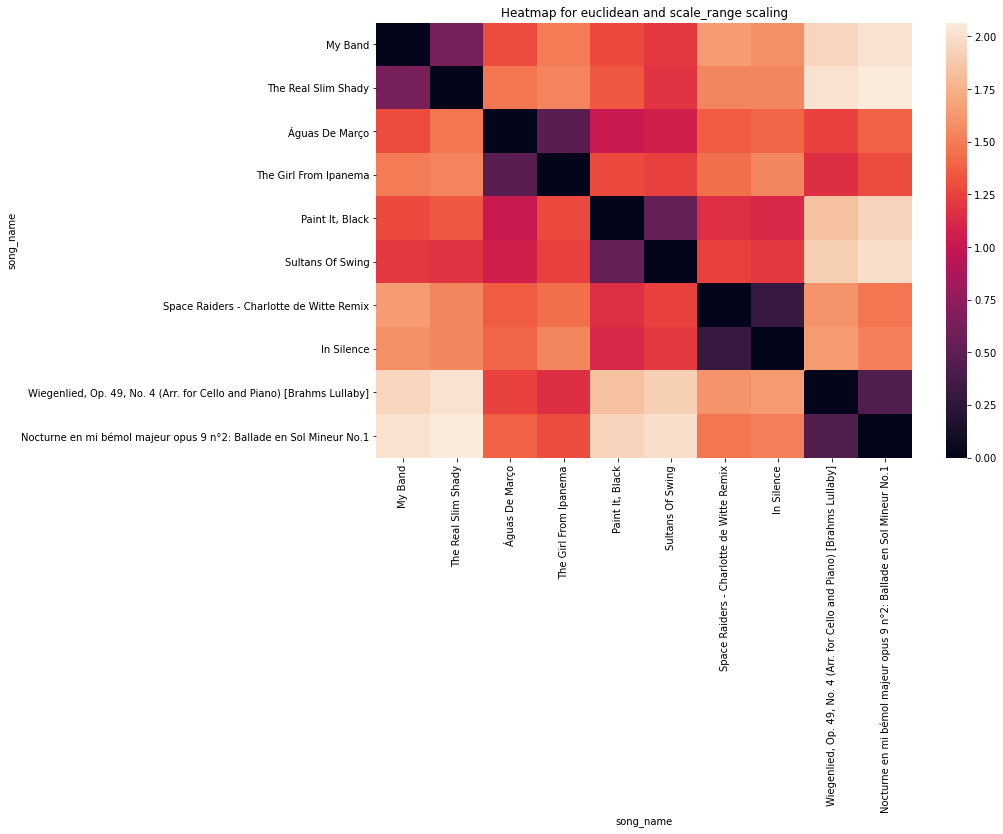

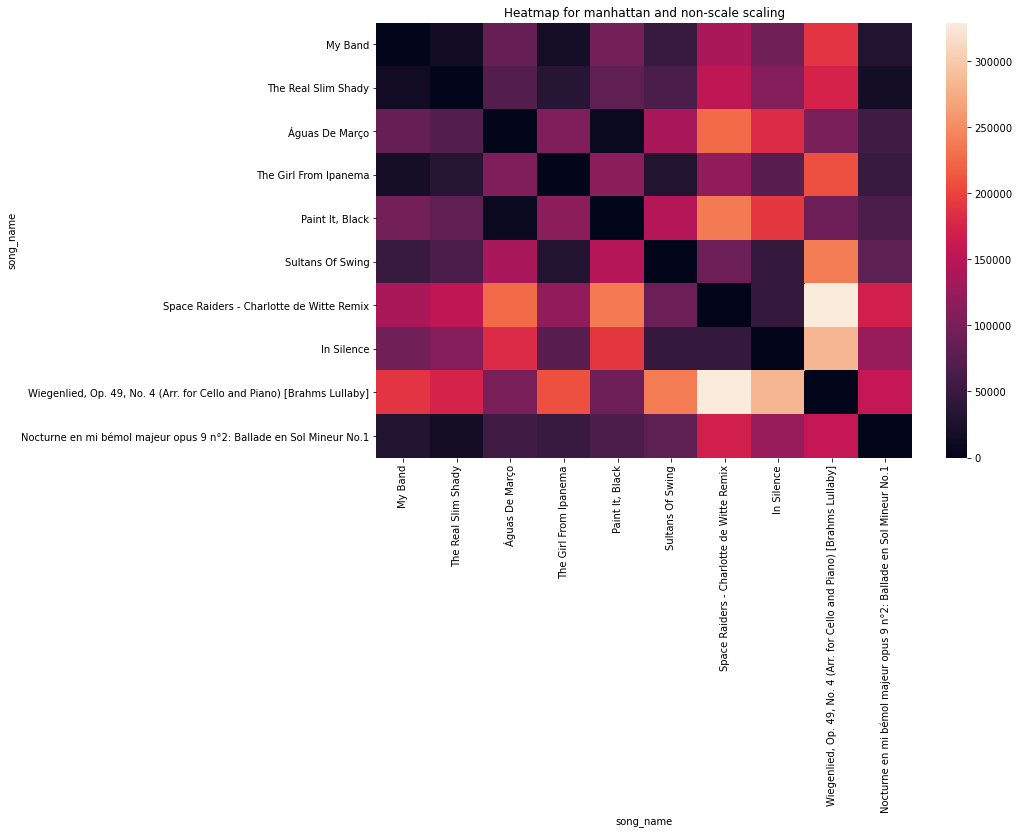

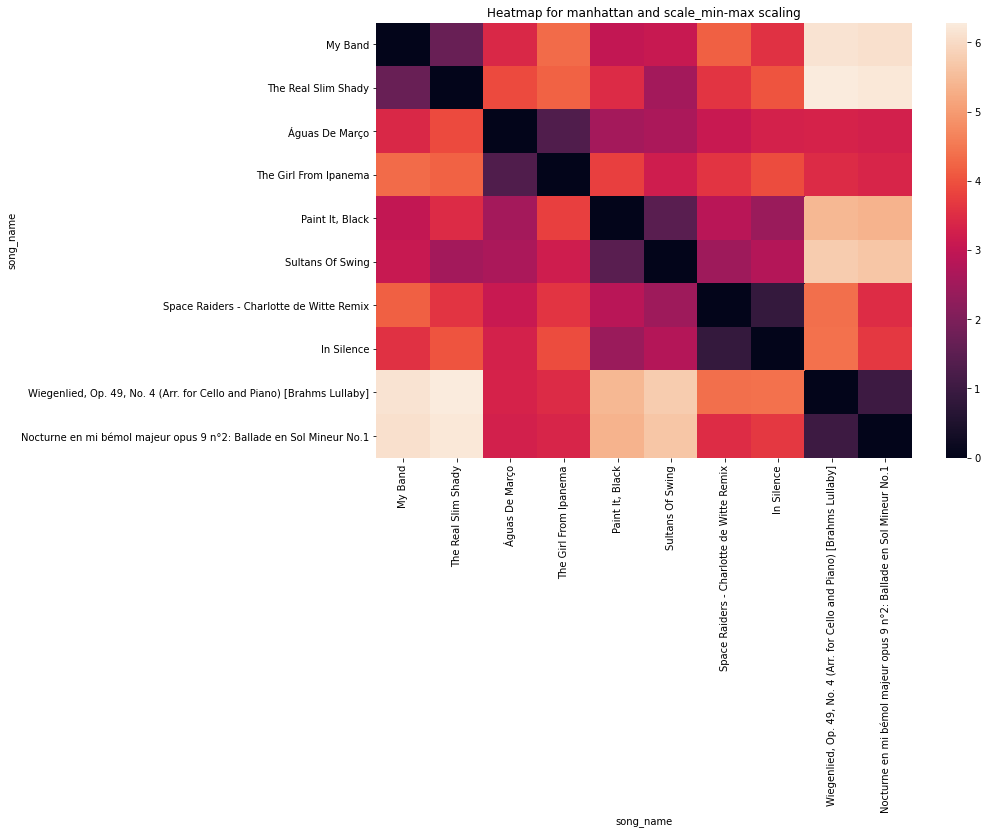

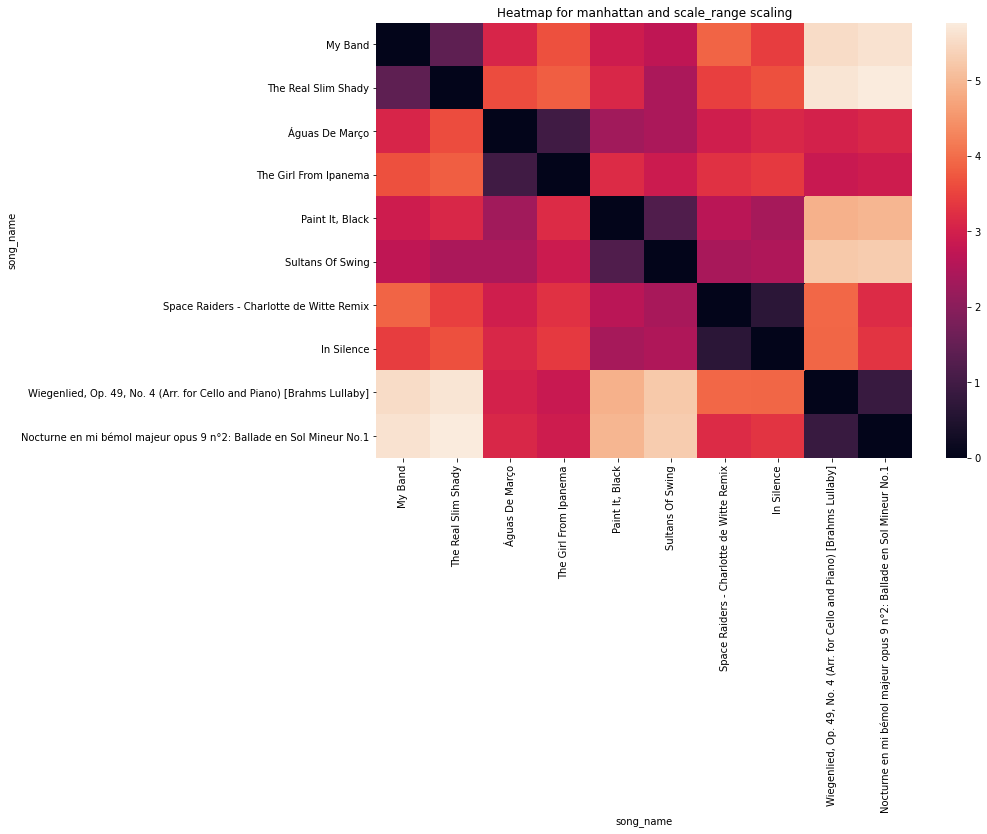

In [141]:
math = ['euclidean','manhattan']
scales = ['non-scale','scale_min-max','scale_range']

for func in math:
    for scale in scales:
        return_combination(songs.copy(),func,scale)